In [1]:
!git clone https://github.com/Cambara-Project-Bangkit/Machine-Learning

Cloning into 'Machine-Learning'...
remote: Enumerating objects: 10088, done.
remote: Counting objects: 100% (644/644), done.
remote: Compressing objects: 100% (81/81), done.
remote: Total 10088 (delta 563), reused 634 (delta 561), pack-reused 9444
Receiving objects: 100% (10088/10088), 360.75 MiB | 9.30 MiB/s, done.
Resolving deltas: 100% (4361/4361), done.
Updating files: 100% (9886/9886), done.


In [2]:
#import library
import os
import shutil
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from PIL import Image




#Split Dataset

In [3]:
# dataset path directory
dataset_path = "/content/Machine-Learning/Dataset_Hasil/DatasetAksaraWianjana2"

# Path for  directory for  training and validation data
base_output_path = "/content/Machine-Learning/Dataset_Hasil/split_datset"
training_path = os.path.join(base_output_path, "train_data")
validation_path = os.path.join(base_output_path, "val_data")

# List all class in dataset aksara Wianjana
classes = os.listdir(dataset_path)

# Looping through every class
for class_name in classes:
    class_path = os.path.join(dataset_path, class_name)

    # get list file  in each class
    files = os.listdir(class_path)

    # split dataset to training and  validation data, training data(80%) and validation(20%)
    train_files, validation_files = train_test_split(files, test_size=0.3, random_state=42)

    # making new directory
    os.makedirs(os.path.join(training_path, class_name), exist_ok=True)
    os.makedirs(os.path.join(validation_path, class_name), exist_ok=True)

    # move file to training data directory
    for file in train_files:
        source_path = os.path.join(class_path, file)
        destination_path = os.path.join(training_path, class_name, file)
        shutil.copyfile(source_path, destination_path)

    # move file to  validation data directory
    for file in validation_files:
        source_path = os.path.join(class_path, file)
        destination_path = os.path.join(validation_path, class_name, file)
        shutil.copyfile(source_path, destination_path)

print("Split  Dataset  to 70% for training and 30% for validation successfully.")

Split  Dataset  to 70% for training and 30% for validation successfully.


#Check Data Distribution

In [4]:
#Check data distribution
def count_files_in_directory(directory):
    return len(os.listdir(directory))

def check_data_distribution(training_dir, validation_dir):
    classes_training = os.listdir(training_dir)
    classes_validation = os.listdir(validation_dir)

    print("Data distribution in training directory:")
    for class_name in classes_training:
        class_path = os.path.join(training_dir, class_name)
        num_files = count_files_in_directory(class_path)
        print(f"{class_name}: {num_files} files")

    print("\nData distribution in validation directory:")
    for class_name in classes_validation:
        class_path = os.path.join(validation_dir, class_name)
        num_files = count_files_in_directory(class_path)
        print(f"{class_name}: {num_files} files")

# Replace with the appropriate path
TRAINING_DIR = "/content/Machine-Learning/Dataset_Hasil/split_datset/train_data"
VALIDATION_DIR = "/content/Machine-Learning/Dataset_Hasil/split_datset/val_data"

check_data_distribution(TRAINING_DIR, VALIDATION_DIR)

Data distribution in training directory:
Ta: 158 files
Ya: 156 files
Nya: 154 files
Ra: 165 files
Nga: 154 files
Na: 193 files
Ba: 134 files
Ka: 181 files
Ha: 182 files
Ca: 172 files
La: 156 files
Ja: 142 files
Pa: 175 files
Sa: 165 files
Wa: 156 files
Da: 169 files
Ga: 137 files
Ma: 131 files

Data distribution in validation directory:
Ta: 68 files
Ya: 67 files
Nya: 66 files
Ra: 71 files
Nga: 66 files
Na: 83 files
Ba: 58 files
Ka: 78 files
Ha: 78 files
Ca: 74 files
La: 67 files
Ja: 62 files
Pa: 75 files
Sa: 72 files
Wa: 68 files
Da: 73 files
Ga: 59 files
Ma: 57 files


#Data Augmentation

In [5]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
    TRAINING_DIR = "/content/Machine-Learning/Dataset_Hasil/split_datset/train_data"
    VALIDATION_DIR = "/content/Machine-Learning/Dataset_Hasil/split_datset/val_data"

    # NORMALIZE
    training_datagen = ImageDataGenerator(
        rescale=1.0 / 255.0,
        #rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=False,
        fill_mode='nearest',
        )

    validation_datagen = ImageDataGenerator(rescale=1. / 255)

    # Image size use 64x64 and color mode is grayscale
    # Used "categorical"
    train_generator = training_datagen.flow_from_directory(TRAINING_DIR,
                                                           target_size=(64, 64),
                                                           batch_size=32,
                                                           color_mode = 'grayscale',
                                                           class_mode='categorical')
    validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                                  target_size=(64, 64),
                                                                  batch_size=32,
                                                                  color_mode= 'grayscale',
                                                                  class_mode='categorical')
    return train_generator, validation_generator


In [6]:
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 2880 images belonging to 18 classes.
Found 1242 images belonging to 18 classes.


#Build the model

In [7]:
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64,1)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(18, activation="softmax"),
    ])

    #model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

    print("This is model summary")
    model.summary()

    return model
# calling create_model() function
model = create_model()


This is model summary
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None

In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_generator, epochs=250, batch_size=32,validation_data=validation_generator)

Epoch 1/250
90/90 [==============================] - 15s 51ms/step - loss: 2.8907 - accuracy: 0.0625 - val_loss: 2.8352 - val_accuracy: 0.0829
Epoch 2/250
90/90 [==============================] - 4s 40ms/step - loss: 2.7955 - accuracy: 0.1007 - val_loss: 2.4901 - val_accuracy: 0.2383
Epoch 3/250
90/90 [==============================] - 5s 54ms/step - loss: 2.4074 - accuracy: 0.2417 - val_loss: 1.5179 - val_accuracy: 0.5290
Epoch 4/250
90/90 [==============================] - 4s 39ms/step - loss: 1.7815 - accuracy: 0.4247 - val_loss: 1.0375 - val_accuracy: 0.6498
Epoch 5/250
90/90 [==============================] - 4s 39ms/step - loss: 1.3930 - accuracy: 0.5479 - val_loss: 0.8672 - val_accuracy: 0.7271
Epoch 6/250
90/90 [==============================] - 7s 82ms/step - loss: 1.1559 - accuracy: 0.6455 - val_loss: 0.7786 - val_accuracy: 0.7520
Epoch 7/250
90/90 [==============================] - 3s 39ms/step - loss: 0.9663 - accuracy: 0.6997 - val_loss: 0.6642 - val_accuracy: 0.7923
Epoch

#Visualization of the comparison of accuracy and validation accuracy

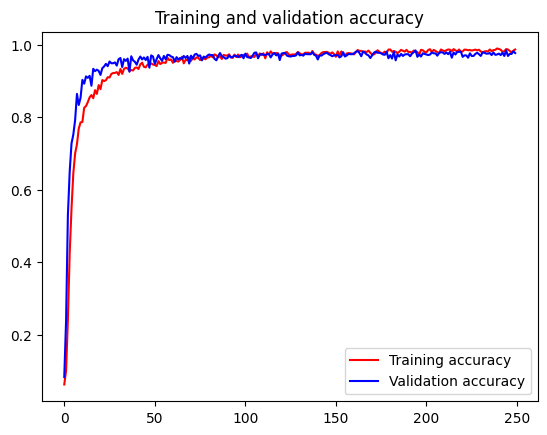

<Figure size 640x480 with 0 Axes>

In [9]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [10]:
model.save('/content/Machine-Learning/model_cambara.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [11]:
import os
import cv2
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# create a function to load and process images
def load_and_process_image(image_path, target_size=(64, 64)):
    img = load_img(image_path, color_mode='grayscale', target_size=target_size)
    img_array = img_to_array(img)
    # Normalize to a range of 0-1
    img_array = img_array / 255.0
    return img_array

# Function to load test data and labels
def load_test_data(test_dir):
    data = []
    labels = []
    class_names = sorted(os.listdir(test_dir))
    class_mapping = {class_name: i for i, class_name in enumerate(class_names)}  # Encoding kelas

    for class_name in class_names:
        class_path = os.path.join(test_dir, class_name)

        #Add folder existence check
        if not os.path.isdir(class_path):
            print(f"Warning: Folder {class_path} not found.")
            continue

        class_label = class_mapping[class_name]
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)

            try:
                img_array = load_and_process_image(image_path)
                data.append(img_array)
                labels.append(class_label)
            except Exception as e:
                print(f"Error loading image {image_path}: {str(e)}")

    return np.array(data), np.array(labels)


#determine the path model
model_path = "/content/Machine-Learning/model_cambara.h5"

# Load model
model = keras.models.load_model(model_path)

# Specify the test data folder path
test_data_dir = "/content/Machine-Learning/Dataset_Hasil/Dara_Test_Aksara2"

# Load data uji
X_test, y_test = load_test_data(test_data_dir)

# Make predictions using the model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(keras.utils.to_categorical(y_test), axis=1)

# Model evaluation
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
classification_rep = classification_report(y_true_classes, y_pred_classes)

# Display confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Show classification report
print("\nclassification results are as follows:")
print(classification_rep)

9/9 [==============================] - 0s 13ms/step
Confusion Matrix:
[[15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  1  6  0  0  0  0  0  0  2  0  0  0  0  0  6  0  0]
 [ 2  0  0 12  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0 13  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  1 13  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0 14  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0 13  1  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0 14  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0 14  0  0  0  0  0]
 [ 0  0  0  0  0  1  2  0  0  4  0  0  0  8  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0 14  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0 14  0  0]
 [ 0  0  0  0  0  

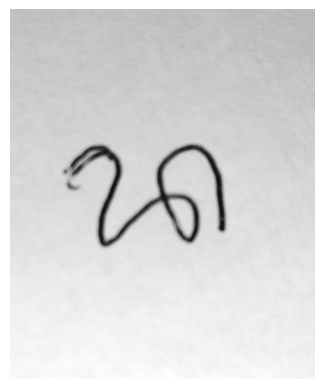

1/1 [==============================] - 0s 98ms/step
Predicted of Class of Aksara Bali Wianjana: Da


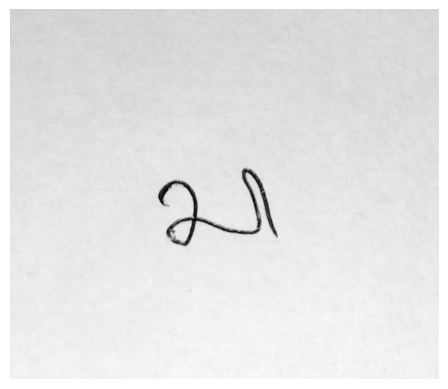

1/1 [==============================] - 0s 27ms/step
Predicted of Class of Aksara Bali Wianjana: Sa


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions
from tensorflow.keras.models import load_model

# Load model
model = load_model('/content/Machine-Learning/model_cambara.h5')

# list class
class_names = ['Ba', 'Ca', 'Da','Ga', 'Ha','Ja', 'Ka','La','Ma','Na','Nga', 'Nya', 'Pa','Ra','Sa','Ta','Wa','Ya']
def load_and_process_image(img_path):
    img = image.load_img(img_path, color_mode='grayscale', target_size=(64, 64))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    return img_array

def predict_image(img_path):
    img_array = load_and_process_image(img_path)
    predictions = model.predict(img_array)
    class_index = np.argmax(predictions[0])
    class_name = class_names[class_index]
    return class_name

def display_image_and_prediction(img_path):
    img = image.load_img(img_path, color_mode='grayscale')
    img_array = image.img_to_array(img)

    plt.imshow(np.uint8(img_array[:, :, 0]), cmap='gray')
    plt.axis('off')
    plt.show()

    prediction = predict_image(img_path)
    print(f"Predicted of Class of Aksara Bali Wianjana: {prediction}")

# Change with image test path

test_image_path_da = '/content/test_da.jpg'
test_image_path_sa = '/content/test_sa.jpg'






# show the image test and
display_image_and_prediction(test_image_path_da)
display_image_and_prediction(test_image_path_sa)
